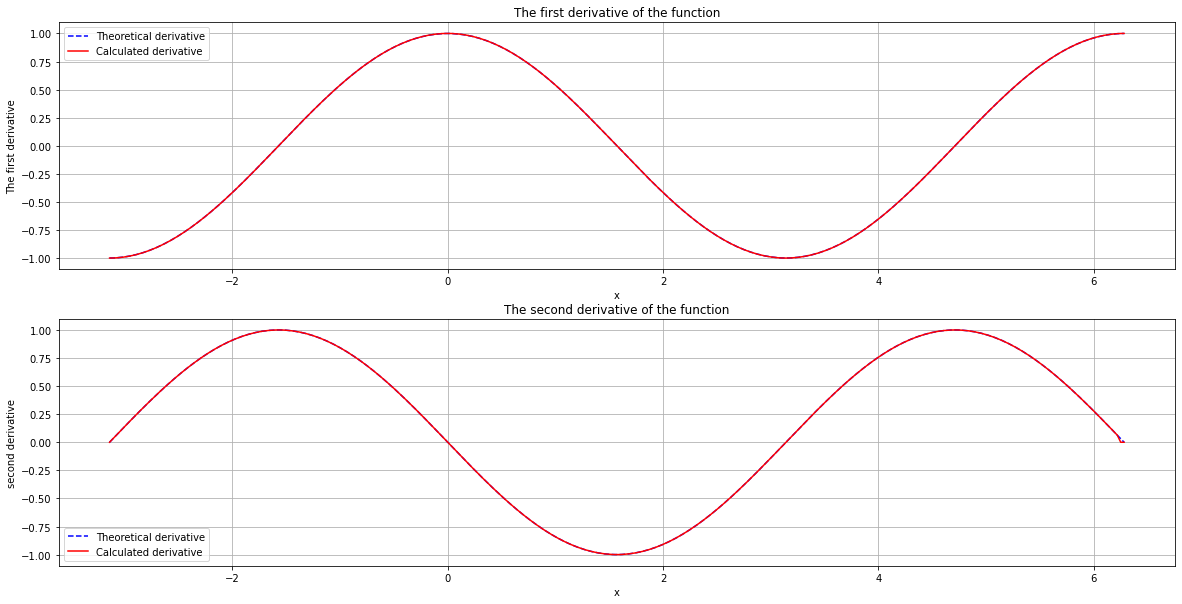

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants declaration
x_min = -np.pi
x_max = 2 * np.pi
points = 300

x = np.linspace (start=x_min, stop=x_max, num=points)
h = x[2] - x[1]

f = np.sin (x)
df_th = np.zeros(f.size)
df_th = np.cos (x)
d2f_th = -np.cos (x)

#-----------------------------------------------------------------------------------------------------------
# Function der1_ord1 is used to find the first defivative of the function with the first infinitesimal order
# param f is a set of function values
# param h is the argument step between these values
# returns the first derivative
#-----------------------------------------------------------------------------------------------------------
def der1_ord1 (f, h):
  df = np.zeros (f.size)
  for i in range (f.size - 1):
    df[i] = (f[i+1] - f[i]) / h
  df[f.size - 1] = (f[f.size - 1] - f[f.size - 2]) / h
  return df

#------------------------------------------------------------------------------------------------------------
# Function der1_ord2 is used to find the first defivative of the function with the second infinitesimal order
# param f is a set of function values
# param h is the argument step between these values
# returns the first derivative
#------------------------------------------------------------------------------------------------------------
def der1_ord2 (f, h):
  df = np.zeros (f.size)
  for i in range (f.size - 2):
    df[i] = (-3 * f[i] + 4 * f[i+1] - f[i+2]) / (2 * h)

  df[f.size - 2] = (3 * f[f.size - 2] - 4 * f[f.size - 3] + f[f.size - 4]) / (2 * h)
  df[f.size - 1] = (3 * f[f.size - 1] - 4 * f[f.size - 2] + f[f.size - 3]) / (2 * h)
  return df

#------------------------------------------------------------------------------------------------------------
# Function der2_ord2 is used to find the second defivative of the function with the second infinitesimal order
# param f is a set of function values
# param h is the argument step between these values
# returns the second derivative
#------------------------------------------------------------------------------------------------------------
def der2_ord2 (f, h):
  h2 = h * h
  d2f = np.zeros (f.size)
  for i in range (1, f.size - 2):
    d2f[i] = (f[i+1] - 2 * f[i] + f[i-1]) / h2
  d2f[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / h2
  d2f[f.size - 1] = (2 * f[f.size - 1] - 5 * f[f.size - 2] + 4 * f[f.size - 3] - f[f.size - 4]) / h2
  return d2f

#------------------------------------------------------------------------------------------------------------
# Graphics
#------------------------------------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

#------------------------------------------------------------------------------------------------------------
# The first graph compares the calculated first derivate of the function with the theoretical
#------------------------------------------------------------------------------------------------------------
ax1.plot (x, np.cos (x), linestyle= '--',color= 'blue', label='Theoretical derivative')
ax1.plot (x, der1_ord2(f, h), color= 'red', label='Calculated derivative')

ax1.set_title ('The first derivative of the function')

ax1.legend()

ax1.set_xlabel ('x')
ax1.set_ylabel ('The first derivative')

ax1.grid(True)


#------------------------------------------------------------------------------------------------------------
# The second graph compares the calculated second derivate of the function with the theoretical
#------------------------------------------------------------------------------------------------------------
ax2.plot (x, -np.sin (x), linestyle= '--',color= 'blue', label='Theoretical derivative')
ax2.plot (x, der2_ord2(f, h), color= 'red', label='Calculated derivative')

ax2.set_title ('The second derivative of the function')

ax2.legend()

ax2.set_xlabel ('x')
ax2.set_ylabel ('second derivative')

ax2.grid(True)

plt.show()



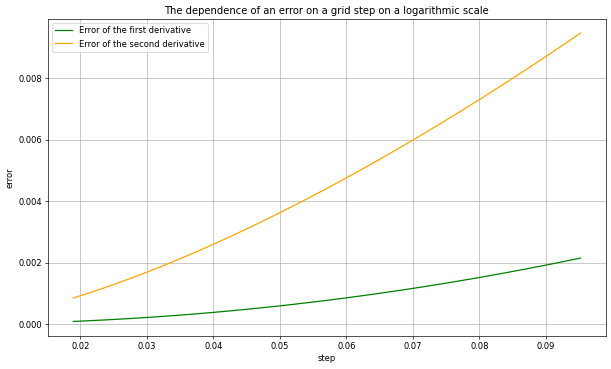

In [ ]:
#---------------------------------------------------------------------
# Function generate_x generates x array 
# the first element is x_min(constant), the last is x_max(constant)
# param [in] number of points
# returns x array
#---------------------------------------------------------------------
def generate_x (num_points):
  x = np.linspace (start=x_min, stop=x_max, num=num_points)
  return x

#---------------------------------------------------------------------
# Function calc_h calculates an argument step h in x array 
# param [in] x_array 
# returns h an argument step
#---------------------------------------------------------------------
def calc_h (x_arr):
  return np.abs (x_arr[2] - x_arr[1])

#---------------------------------------------------------------------
# Function template_error_arr calculates an error of the derivative
# param [in] x is arr x array
# param [in] f_obj_calc  is function object f(x)
# param [in] df_obj_calc is function object der1_ord2() calculated
# param [in] df_obj_ref  is function object f'(x) theoretical
# returns an array of errors of the derivatives
#---------------------------------------------------------------------
def template_error_arr (x_arr, f_obj_calc, df_obj_calc, df_obj_ref):
  h = calc_h (x_arr)
  f = f_obj_calc (x_arr)
  df_calc = df_obj_calc (f, h)
  df_ref = df_obj_ref (x_arr)

  template_error = np.std (df_calc - df_ref)

  return template_error

#---------------------------------------------------------------------
# Function error_der1 calculates errors of the.... in dependense of step 
# returns two arrays: set of steps and set of maximum of errors
#---------------------------------------------------------------------

def error_der (start, stop):
  size_arr = stop - start
  f2 = lambda x: -np.sin(x)

  h_arr = np.zeros (size_arr)
  error1_max_arr = np.zeros (size_arr)
  error2_max_arr = np.zeros (size_arr)

  for i in range (start, stop):
    x_arr = generate_x (i)
    error1_arr = template_error_arr (x_arr, np.sin, der1_ord2, np.cos)
    error2_arr = template_error_arr (x_arr, np.sin, der2_ord2, f2)

    j = i - start
    h_arr[j] = calc_h (x_arr)
    error1_max_arr[j] = np.max (error1_arr)
    error2_max_arr[j] = np.max (error2_arr)

  return [h_arr, error1_max_arr, error2_max_arr]

h_arr, error1_max_arr, error2_max_arr = error_der (100, 500)


#---------------------------------------------------------------------
# The graph demonstrates the dependence of the error on a grip step
#---------------------------------------------------------------------
plt.figure (figsize = [12, 7], dpi=60)
plt.plot (h_arr, error1_max_arr, color="green", label='Error of the first derivative')
plt.plot (h_arr, error2_max_arr, color='orange', label='Error of the second derivative')

plt.title ('The dependence of an error on a grid step on a logarithmic scale')

plt.legend()

plt.xlabel ('step')
plt.ylabel ('error')
plt.grid (True)


